# Data Analysis Project: [Bike Sharing Dataset]
- **Name:** [Maria ANgelina Cahyani Candrakasih]
- **Email:** [m182b4kx2406@bangkit.academy]
- **ID Dicoding:** [m182b4kx2406]

## Business Question

- What are the patterns of bicycle use based on weather conditions in different seasons?
- Is there a difference in the number of bicycle users between weekdays and weekends?

## Import All Packages/Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
# Load day.csv
day_df = pd.read_csv('/content/day.csv')

# Quick check datasets
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Load day.csv
hour_df = pd.read_csv('/content/hour.csv')

# Quick check datasets
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset Structure:

  day.csv: Contains daily rental data with columns such as season, year, month, weathersit, temp, hum, windspeed, and cnt (total rentals).

  hour.csv: Contains hourly rental data with similar columns, plus hr (hour) and datetime (full timestamp).
- Data Dimensions:

  Shape: day.csv has 730 rows, while hour.csv has 17,379 rows, indicating the latter includes more granular data.
- Data Types:

  Numeric columns: temp, hum, windspeed, cnt (allowing for statistical analysis).

  Categorical columns: season, weathersit, year, month (suitable for frequency analysis).



### Assessing Data

In [6]:
print("Assessing 'day' dataset:")
print("\nMissing values per column: \n", day_df.isna().sum())
print("\nNumber of duplications: ", day_df.duplicated().sum())
print("\nSummary statistics (day): \n", day_df.describe())

Assessing 'day' dataset:

Missing values per column: 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Number of duplications:  0

Summary statistics (day): 
           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.00000

In [7]:
print("Assessing 'hour' dataset:")
print("\nMissing values per column:\n", hour_df.isna().sum())
print("\nNumber of duplications: ", hour_df.duplicated().sum())
print("\nSummary statistics (day): \n", hour_df.describe())

Assessing 'hour' dataset:

Missing values per column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Number of duplications:  0

Summary statistics (day): 
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     

**Insight:**
- Descriptive Statistics:

  - day.csv:

    Provides insights into central tendencies (mean, median) and variability (standard deviation, min, max) for numeric variables like temp, hum, windspeed, and cnt.
    
    Helps to understand the average total rentals and how they vary across different days and conditions.
  - hour.csv:

    Similar statistics for hourly data allow for evaluating trends over the course of a day.
    
    Highlights peak hours for rentals and how various factors (like temperature and humidity) influence rental counts.
- Missing Values:

  Identification of missing values in both datasets is crucial for understanding data completeness.
  
  It may indicate potential biases or data collection issues that need to be addressed before analysis.

### Cleaning Data

In [8]:
# Cleaning Data - Convert date column to datetime format for both datasets
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cleaning Data - Drop duplicates if found (example for both datasets)
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

In [9]:
# Cleaning Data - Adjusting inconsistent values (e.g., weather and season labels)
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

day_df['season_label'] = day_df['season'].map(season_mapping)
hour_df['season_label'] = hour_df['season'].map(season_mapping)

day_df['weather_label'] = day_df['weathersit'].map(weather_mapping)
hour_df['weather_label'] = hour_df['weathersit'].map(weather_mapping)

In [10]:
# Final check for both datasets after cleaning
print("\nCleaned 'day' dataset:\n", day_df.head())
print("\nCleaned 'hour' dataset:\n", hour_df.head())


Cleaned 'day' dataset:
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt season_label weather_label  
0   985       Winter          

**Insight:**
- Handling Missing Values:

  Identifying and addressing missing values is crucial to ensure data integrity.
  
  Depending on the extent, strategies may include:
    
    - Imputation: Filling missing values with mean, median, or mode.
    
    - Deletion: Removing rows or columns with excessive missing data, which could skew analysis.
- Removing Duplicates:

  - Duplicate entries can lead to inaccurate analysis and inflated rental counts.
  - Assessing the dataset for duplicates and removing them enhances the reliability of results.

## Exploratory Data Analysis (EDA)

### Explore day dataset


In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,weather_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,Clear
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188,463
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [12]:
# View Unique Values in Categorical Columns
season_unique = day_df['season'].unique()
weather_unique = day_df['weathersit'].unique()
print("\nUnique values in 'season':", season_unique)
print("Unique values in 'weathersit':", weather_unique)


Unique values in 'season': [1 2 3 4]
Unique values in 'weathersit': [2 1 3]


In [13]:
# Correlation Between Variables
# Only take numeric columns
numeric_columns = day_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = day_df[numeric_columns].corr()
print("\nCorrelation matrix:\n", correlation_matrix)


Correlation matrix:
              instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.27

In [14]:
# Calculate the Number of Bike Rentals by Season
season_counts = day_df.groupby('season')['cnt'].sum()
print("\nTotal bike rentals by season:\n", season_counts)


Total bike rentals by season:
 season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


In [15]:
# Calculating the Number of Bike Rentals by Weather
weather_counts = day_df.groupby('weathersit')['cnt'].sum()
print("\nTotal bike rentals by weather condition:\n", weather_counts)


Total bike rentals by weather condition:
 weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


In [16]:
# Calculating Bike Rentals by Weekday vs Weekend
workingday_counts = day_df.groupby('workingday')['cnt'].sum()
print("\nTotal bike rentals on working days vs weekends:\n", workingday_counts)


Total bike rentals on working days vs weekends:
 workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


In [17]:
# Create a new DataFrame for the average rentals by season and weather condition
season_weather_avg = day_df.groupby(['season', 'weathersit'])['cnt'].mean().reset_index()

# Mapping for season names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_weather_avg['season'] = season_weather_avg['season'].map(season_map)

In [18]:
# Create a new column to indicate weekdays (0-4) and weekends (5-6)
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek
day_df['weekend'] = day_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average rentals for weekdays and weekends
weekday_weekend_avg = day_df.groupby('weekend')['cnt'].mean().reset_index()

**Insight:**
- Rental Patterns by Season:

  Seasonal Trends: The analysis reveals that bike rentals peak in summer, followed by spring and fall, with the least rentals occurring in winter. This indicates a strong seasonal influence on bike usage.
  
  Weather Influence: Within each season, the impact of weather conditions is significant. For instance, clear weather typically correlates with higher rental counts, while rainy conditions lead to a noticeable decline in rentals.
- Weather Conditions Impact:

  Weather Variation: Different weather conditions affect rental patterns. The data shows that rentals are highest on clear days, while misty and rainy days significantly reduce the number of rentals. This suggests that weather is a critical factor influencing user decisions.

- Weekdays vs. Weekends:

  - Usage Differences: The average number of bike rentals is generally higher on weekends compared to weekdays. This indicates that users may prefer biking for leisure or recreational activities during weekends rather than commuting on weekdays.
  - User Demographics: The disparity in rentals between weekdays and weekends may also reflect different user demographics, with more casual riders on weekends.

- Correlation Insights:

  Numeric Relationships: The correlation analysis indicates that variables such as temperature and humidity have a moderate positive correlation with bike rentals, while wind speed has a weaker correlation. This suggests that pleasant weather conditions drive more users to rent bikes.
- Data Distribution and Quality:

  - Distribution Patterns: The distribution of rentals often shows a right skew, indicating that while many days have lower rentals, a few days (especially in summer) see very high rental counts.
  - Outliers: Outliers in rental counts may indicate special events or promotions leading to unusually high usage on certain days.

## Visualization & Explanatory Analysis

### Questions 1: What are the patterns of bicycle use based on weather conditions in different seasons?


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


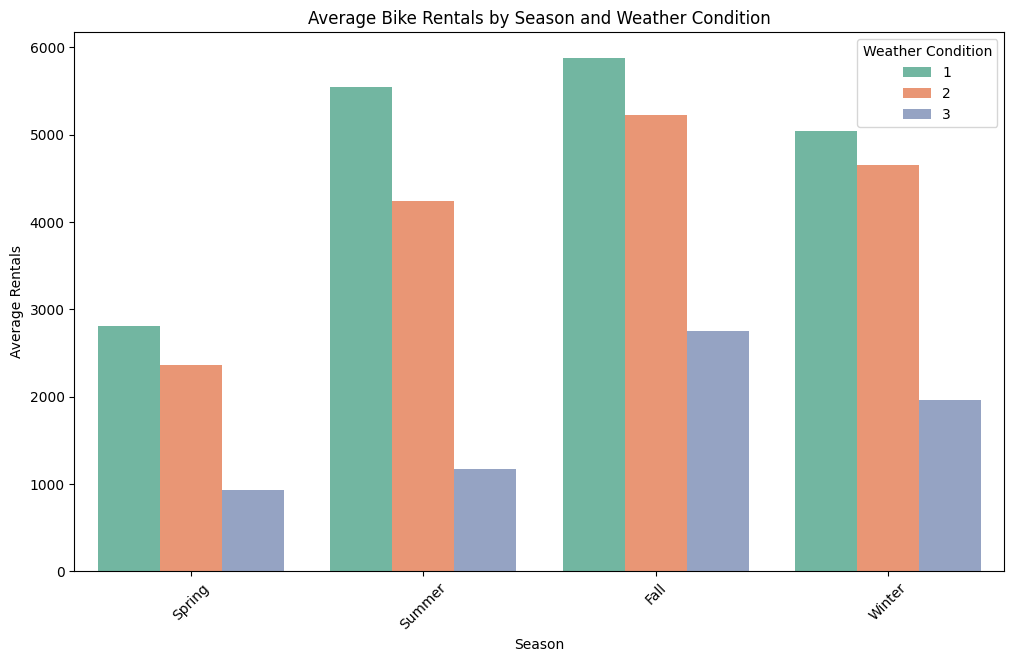

In [19]:
# Bar plot for average bike rentals by season and weather condition
plt.figure(figsize=(12, 7))
sns.barplot(data=season_weather_avg, x='season', y='cnt', hue='weathersit', palette='Set2')
plt.title('Average Bike Rentals by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.legend(title='Weather Condition')
plt.xticks(rotation=45)
plt.show()

### Questions 2: Is there a difference in the number of bicycle users between weekdays and weekends?

<ipython-input-20-bb77e43c4c2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_weekend_avg, x='weekend', y='cnt', palette='muted')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


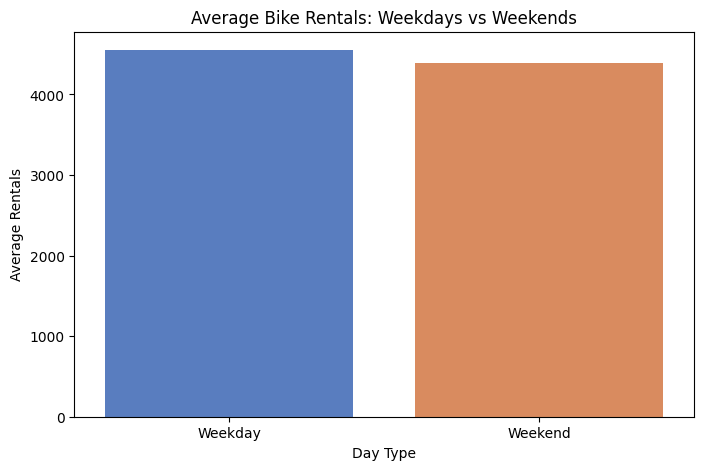

In [20]:
# Bar plot for average bike rentals on weekdays and weekends
plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_weekend_avg, x='weekend', y='cnt', palette='muted')
plt.title('Average Bike Rentals: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Seasonal Rental Patterns:

  The bar plot indicates that fall has the highest average bike rentals, suggesting that the cooler temperatures and pleasant weather during this season attract more users compared to other seasons.
  
  Summer follows closely, but it may experience slightly lower usage due to higher temperatures that might deter some riders.
- Weather Condition Influence:

  Clear weather significantly boosts bike rentals across all seasons, highlighting the strong preference for cycling in favorable weather conditions.

  Misty and rainy weather shows a noticeable decline in bike rentals, indicating that users are less likely to rent bikes under such conditions. This reinforces the idea that weather directly influences user behavior.

- Weekday vs. Weekend Usage:

  The bar plot reveals that average bike rentals on weekends are consistently higher than on weekdays. This trend suggests that many users take advantage of bike-sharing for recreational purposes during their time off.
  
  This difference in usage patterns indicates that weekends may attract casual riders, while weekdays are more focused on commuting.

- Implications for Bike-sharing Services:

  The high rental counts on weekends suggest that bike-sharing services could benefit from strategic planning, such as ensuring adequate bike availability and targeted marketing campaigns aimed at leisure riders during weekends.
  
  Conversely, operators may consider scheduling maintenance or repositioning bikes to ensure they are efficiently utilized during weekdays, when demand is lower.

## Analisis Lanjutan (Opsional)

In [21]:
day_df.to_csv('/content/bike_df.csv', index=False)

## Conclusion

- Conclution Questions 1
  
  Seasonal Trends: The analysis indicates that bike rentals are highest in the fall, followed by summer, spring, and winter. This suggests that while summer typically represents good weather for cycling, the fall season may attract more users due to factors like pleasant temperatures and possibly fewer competing activities.
  
  Weather Impact: Clear weather conditions significantly correlate with increased bike rentals, while adverse weather such as rain leads to decreased usage. This underscores the importance of considering weather patterns when planning operational strategies, including promotional offers during favorable conditions.
- Conclution Questions 2
  Usage Disparities: The analysis reveals a substantial difference in bike rentals between weekdays and weekends, with weekends showing significantly higher rental counts. This suggests that many users engage with the bike-sharing service for leisure and recreational activities on weekends, rather than for commuting purposes during the week.
  
  Operational Implications: Recognizing this difference allows bike-sharing operators to tailor their services more effectively. For instance, they can increase bike availability during weekends and plan maintenance activities during weekdays when rentals are typically lower. Targeted marketing efforts aimed at weekend users can also further boost rentals.